<div style="text-align:center; padding:40px;">
  <h1 style="padding:17px;background-color:#40173f;margin:0;color:#f5d6c9;border:1px outline #0d0c0d;font-family:Segoe Script;font-weight: bold;font-size:170%;text-align:center;overflow:hidden;font-weight:1200">Life Expectancy Prediction</h1>
  <p style="padding:17px;background-color:#40173f;margin:0;color:#f5d6c9;border:1px outline #0d0c0d;font-family:Segoe Script;font-weight: bold;font-size:140%;text-align:center;overflow:hidden;font-weight:500">Predicting life expectancy based on various health and socioeconomic factors.</p>
</div>

# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Dataset Metadata</p>

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|


# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Load Important Packages</p>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Load Dataset</p>

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [ ]:
df.shape

(2938, 22)

# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Data Cleaning </p>

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
for cols in df.columns:
    if df[cols].isnull().sum()>0:
        print(cols)

Life expectancy 
Adult Mortality
Alcohol
Hepatitis B
 BMI 
Polio
Total expenditure
Diphtheria 
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
for cols in df.columns:
    if df[cols].isnull().sum()>0:
        df[cols] =  imputer.fit_transform(df[[cols]])

# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Check Outliers </p>

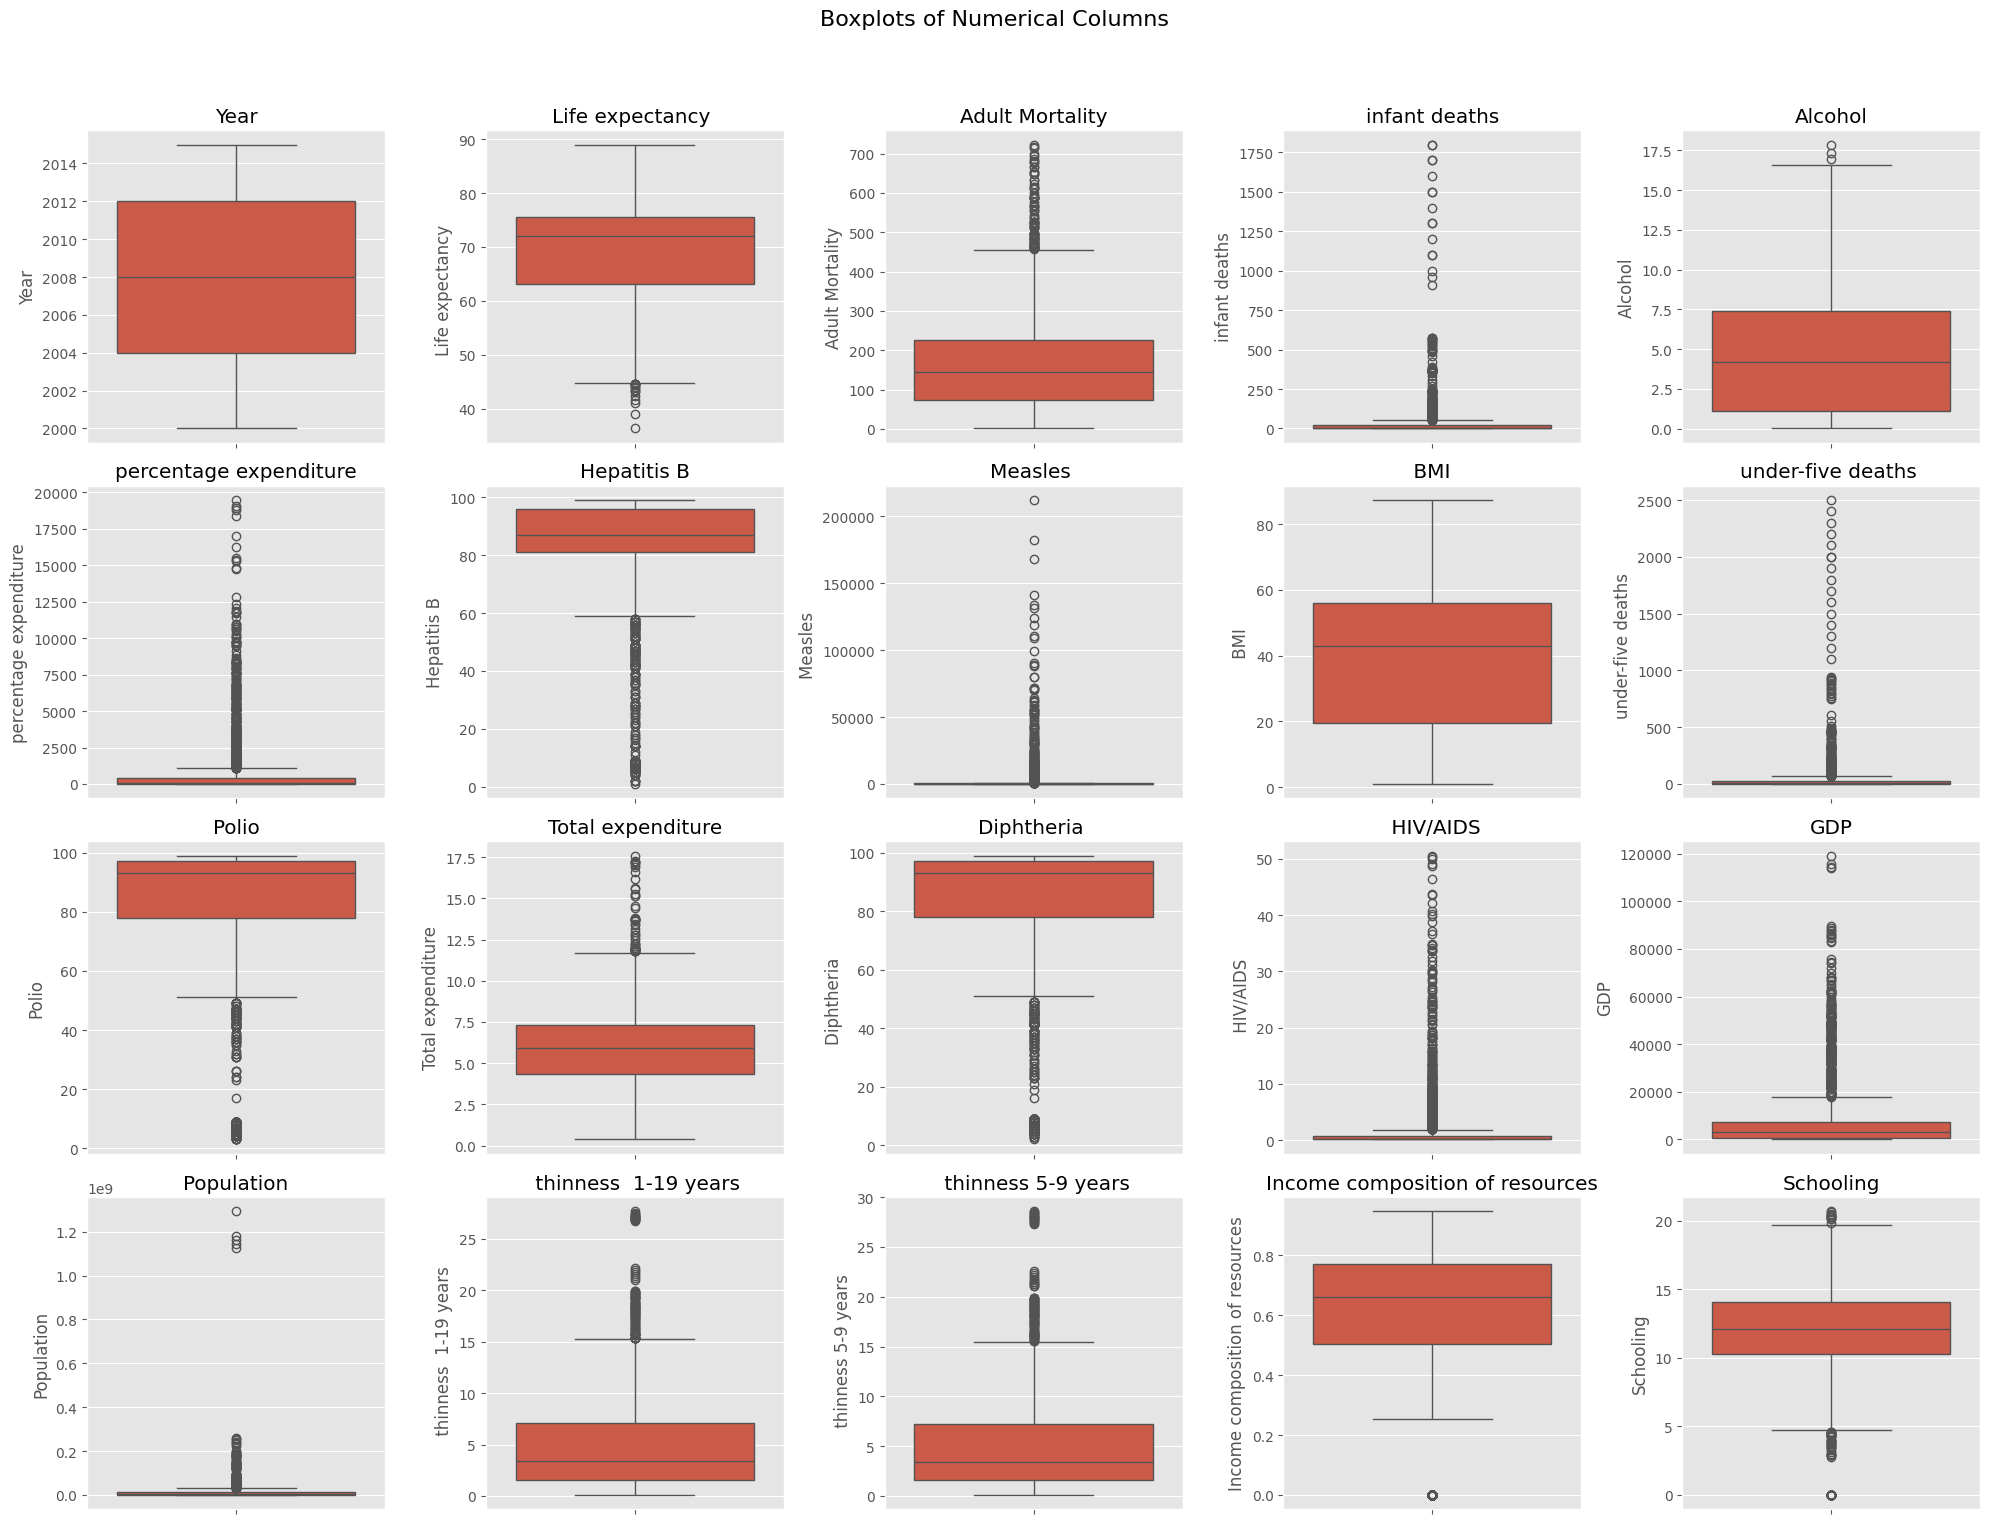

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Specify the list of columns you want to handle outliers for
outlier_cols = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in outlier_cols:
    # Calculate quartiles and IQR
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound),
                            np.mean(df[col_name]), df[col_name])

In [ ]:
df.shape

(2938, 22)

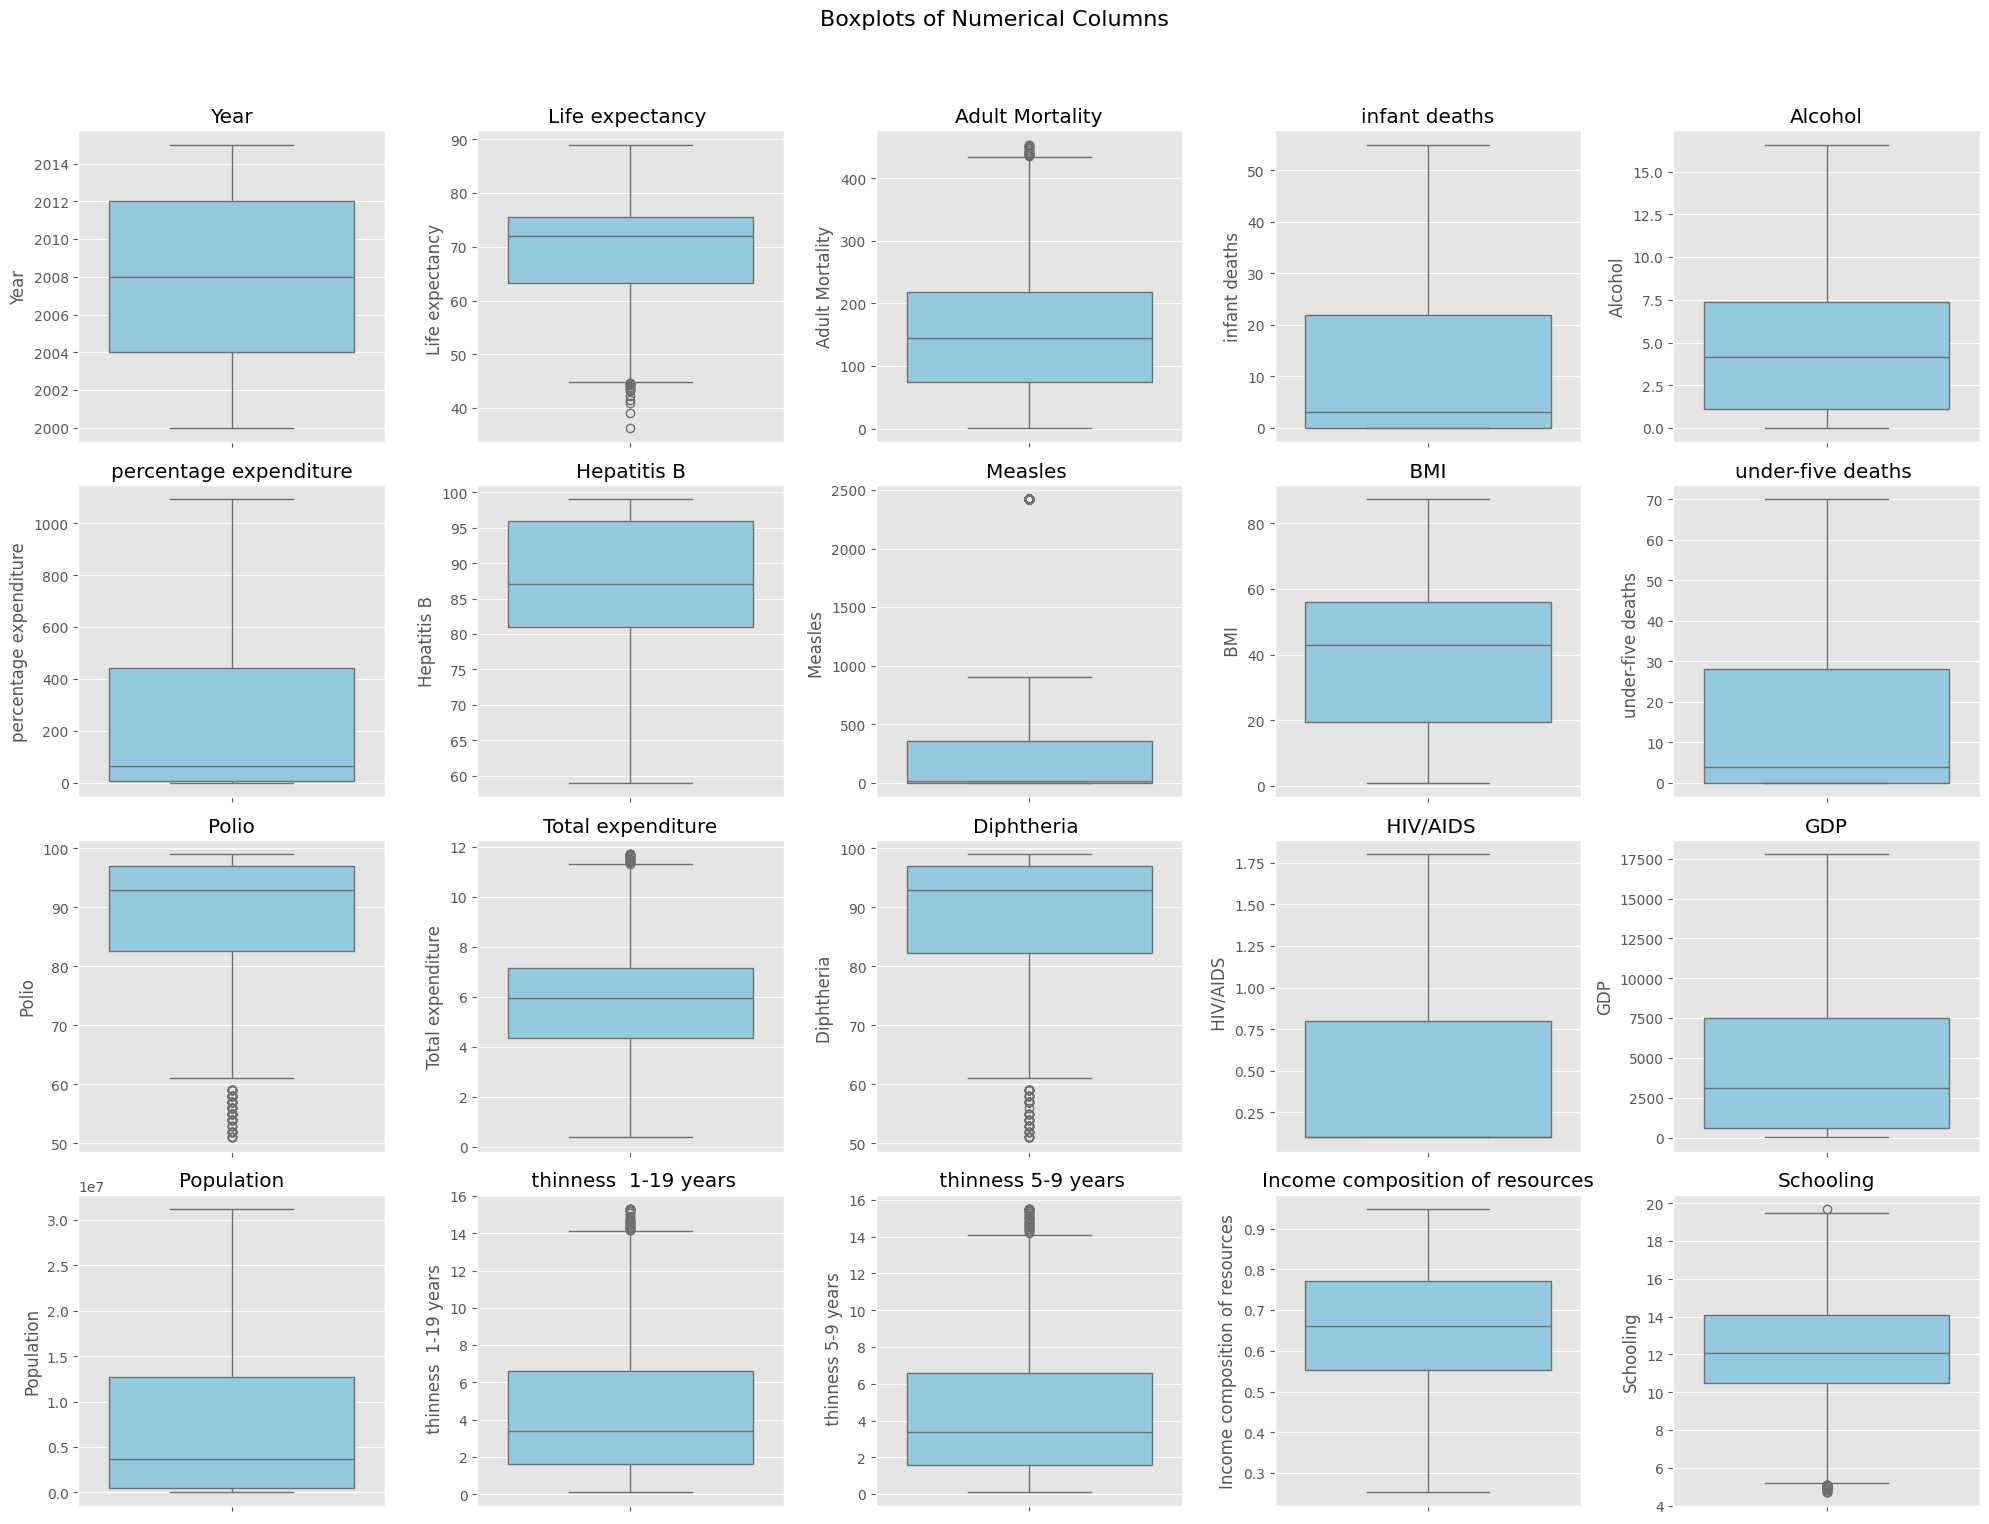

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Exploratory Data Analysis </p>

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,30.303948,0.01,71.279624,65.0,2419.59224,...,82.550188,8.16,65.0,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,30.303948,0.01,73.523582,62.0,492.00000,...,58.000000,8.18,62.0,0.1,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,30.303948,0.01,73.219243,64.0,430.00000,...,62.000000,8.13,64.0,0.1,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,30.303948,0.01,78.184215,67.0,2419.59224,...,67.000000,8.52,67.0,0.1,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,30.303948,0.01,7.097109,68.0,2419.59224,...,68.000000,7.87,68.0,0.1,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5


In [ ]:
df.Country.value_counts()

,count
Country,
Afghanistan,16
Peru,16
Nicaragua,16
Niger,16
Nigeria,16
...,...
Niue,1
San Marino,1
Nauru,1


In [ ]:
# Calculate the average life expectancy for each year
average_life_expectancy = df.groupby('Year')['Life expectancy '].mean().reset_index()

# Create the interactive line plot
fig = px.line(average_life_expectancy, x='Year', y='Life expectancy ',
              title='Average Life Expectancy over the Years',
              labels={'Year':'Year', 'Life expectancy':'Life Expectancy (years)'},
              template='plotly_dark')

# Show the plot
fig.show()

In [ ]:
# Create the interactive scatter plot
fig = px.scatter(df, x='Population', y='Life expectancy ',
                 hover_name='Country',
#                  color='Status',
                 animation_frame='Year',
                 title='Population vs Life Expectancy',
                 labels={'Population':'Population', 'Life expectancy':'Life Expectancy (years)'},
                 template='plotly_dark')

# Show the plot
fig.show()

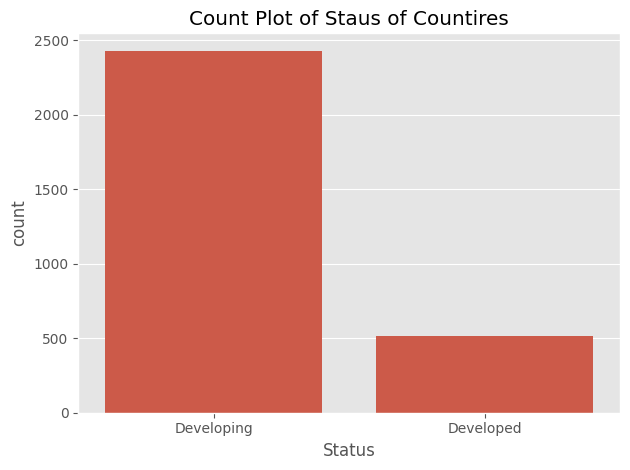

In [ ]:
sns.countplot(x=df['Status'])
plt.title('Count Plot of Staus of Countires')
plt.tight_layout()
plt.show()

In [ ]:
life_expact_status = df.groupby('Status')['Life expectancy '].mean().reset_index()
fig = px.histogram(life_expact_status, x = 'Status', y='Life expectancy ',
                  color='Status')
fig.update_layout(
    title=dict(text='<b>Average Life Expactancy for Status of Country</b>', x=0.5)
)

fig.show()

In [ ]:
# Calculate the average life expectancy and average alcohol consumption for each year
average_data = df.groupby('Year').agg({
    'Life expectancy ': 'mean',
    'Alcohol': 'mean'
}).reset_index()

# Create the interactive plot with dual y-axes
fig = go.Figure()

# Add life expectancy trace
fig.add_trace(go.Scatter(x=average_data['Year'], y=average_data['Life expectancy '],
                         mode='lines+markers', name='Life Expectancy',
                         yaxis='y1'))

# Add alcohol consumption trace
fig.add_trace(go.Scatter(x=average_data['Year'], y=average_data['Alcohol'],
                         mode='lines+markers', name='Alcohol Consumption',
                         yaxis='y2'))

# Update layout for dual y-axes
fig.update_layout(
    title='Life Expectancy and Alcohol Consumption over the Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Life Expectancy (years)', side='left'),
    yaxis2=dict(title='Alcohol Consumption (liters)', side='right', overlaying='y'),
    template='plotly_dark'
)

# Show the plot
fig.show()

In [ ]:
fig = px.bar(df.groupby('Status', as_index=False).agg({'Alcohol':'mean'}), y='Alcohol', x='Status',
                 title='Average Alcohol consumption of Developing and Developed Countries',
                 labels={'Alcohol':'Alcohol Consumption (liters per capita)', 'Life expectancy':'Life Expectancy (years)'},
                 template='plotly_dark')

# Show the plot
fig.show()

In [ ]:
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,30.303948,0.01,71.279624,65.0,2419.59224,...,82.550188,8.16,65.0,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,30.303948,0.01,73.523582,62.0,492.00000,...,58.000000,8.18,62.0,0.1,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0


In [ ]:
aggregated_data = df.groupby('Schooling')['Life expectancy '].mean().reset_index()

# Create the interactive line plot
fig = px.line(aggregated_data, x='Schooling', y='Life expectancy ',
              title='Average Life Expectancy vs Years of Schooling',
              labels={'Schooling':'Years of Schooling', 'Life expectancy':'Life Expectancy (years)'},
              template='plotly_dark')

# Show the plot
fig.show()

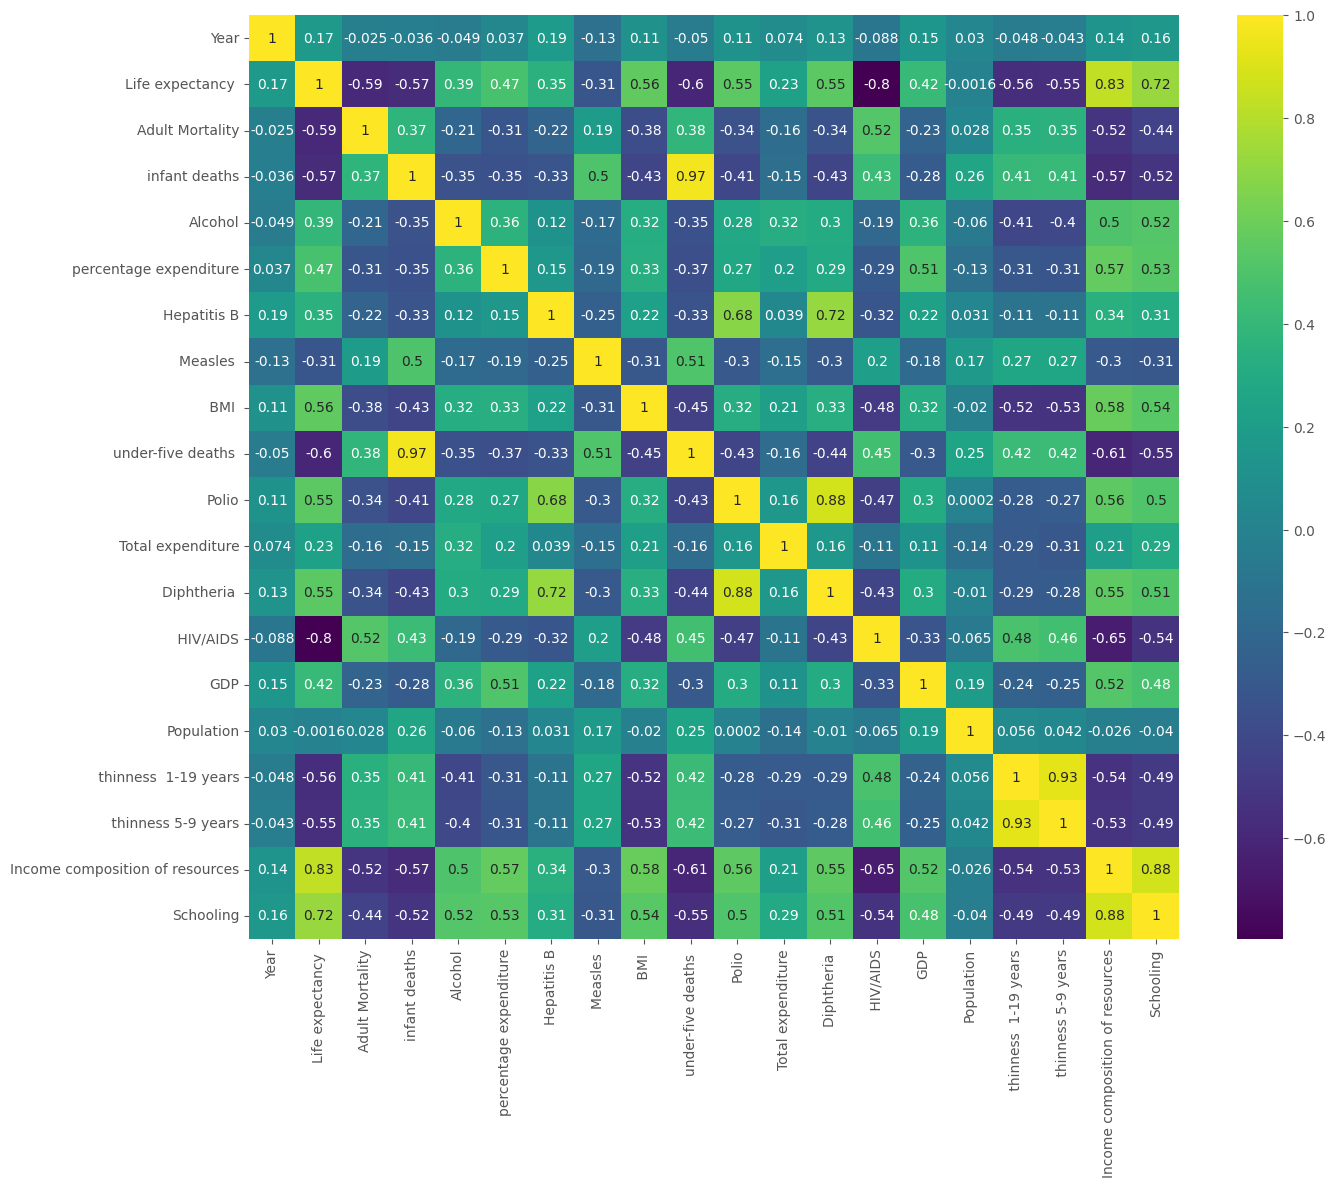

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), cmap='viridis', annot=True)
plt.show()

# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Data Preprocessing </p>

In [ ]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include = 'object').columns
for cols in cat_cols:
    df[cols] = le.fit_transform(df[cols])

In [ ]:
x =  df.drop(columns='Life expectancy ')
y = df['Life expectancy ']

In [ ]:
scaler = StandardScaler()
cols_to_scale = x.drop(columns='Status').columns

# for cols in cols_to_scale:
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

In [ ]:
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-1.691042,1.621762,1,1.057680,1.351263,-1.176057,-0.553370,-2.391880,2.071994,-0.964715,...,-0.539321,1.094972,-2.254819,-0.634808,-0.926044,0.963765,0.145396,0.148652,-1.144346,-0.726426
1,-1.691042,1.404986,1,1.134943,1.351263,-1.176057,-0.545858,-2.717043,-0.023881,-0.989810,...,-2.792128,1.104265,-2.541909,-0.634808,-0.918525,-0.939099,0.145396,0.148652,-1.163816,-0.761514
2,-1.691042,1.188210,1,1.105970,1.351263,-1.176057,-0.546877,-2.500268,-0.091294,-1.014905,...,-2.425075,1.081034,-2.350516,-0.634808,-0.913488,0.963765,0.145396,0.148652,-1.202757,-0.796602
3,-1.691042,0.971434,1,1.144601,1.351263,-1.176057,-0.530255,-2.175105,2.071994,-1.040000,...,-1.966258,1.262237,-2.063426,-0.634808,-0.903384,-0.423119,0.145396,0.148652,-1.248189,-0.831691
4,-1.691042,0.754658,1,1.173575,1.351263,-1.176057,-0.768242,-2.066717,2.071994,-1.060076,...,-1.874495,0.960231,-1.967730,-0.634808,-1.063727,-0.533127,0.145396,0.148652,-1.306601,-0.936956


# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Model Building </p>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [ ]:
print(f"Shape of X_train is: {x_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {x_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)


In [ ]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor()
}

# list to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store results in list
    results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(results)


In [ ]:
results_df=results_df.sort_values("R2 Score", ascending = False)
results_df

,Model,RMSE,R2 Score
3,XGB Regressor,1.981816,0.959251
1,Extra Trees Regressor,1.993149,0.958783
0,Random Forest,2.033441,0.957100
2,GradientBoost Regressor,2.417593,0.939360


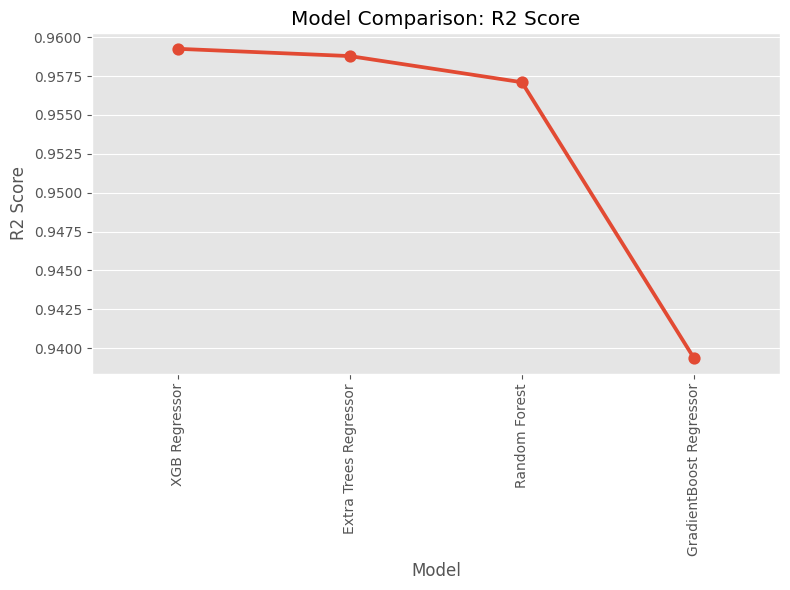

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='R2 Score',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

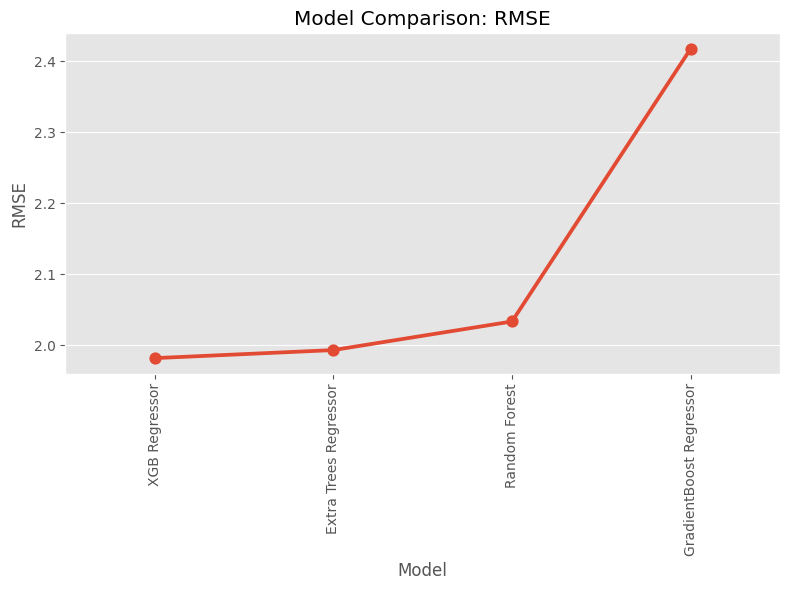

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='RMSE',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

# <p style="color: #40173f;font-family:cursive;font-weight: bold;font-size:110%">Cross Validate Final Model </p>

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

best_model = XGBRegressor()

kf = KFold(n_splits=20, shuffle=True, random_state=42)

cross_val = cross_val_score(best_model, x, y, cv= kf, scoring='r2')
cross_val

array([0.96870258, 0.96957899, 0.97628745, 0.95949212, 0.9747437 ,
       0.94493638, 0.96378644, 0.96325678, 0.98002501, 0.96468556,
       0.94654413, 0.96222682, 0.95963476, 0.95581229, 0.94591112,
       0.95876267, 0.96622263, 0.96710515, 0.96993108, 0.95223263])

Text(0.5, 1.0, 'Cross Validation scores')

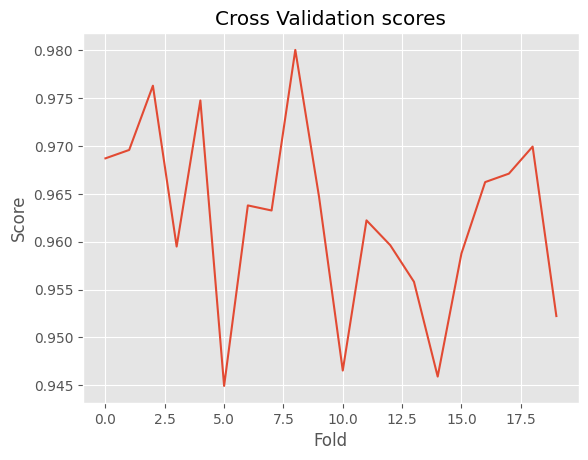

In [ ]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title("Cross Validation scores")

In [ ]:
cross_val.mean()

0.9624939137696394

In [ ]:
cross_val.std()

0.009624725292876094